In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
import cmasher as cm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
# LOAD THE DATA
path = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb = fits.open(path)
data = tb[1].data 

print(len(data))

733900


In [3]:
mask = np.load('../sav/mask_parent.npy', allow_pickle=True)
mask_une = np.load('../sav/mask_unevolved.npy', allow_pickle=True)
print(len(data[mask]), len(data[mask&mask_une]))

194257 4531


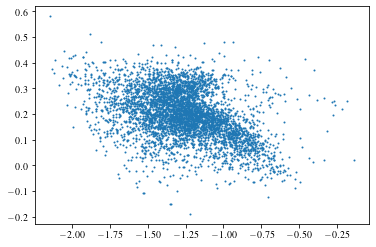

In [4]:
plt.scatter(data['FE_H'][mask&mask_une],data['MG_FE'][mask&mask_une],s=1 )

In [5]:
rapo = np.load('../sav/rapo_gala.npy', allow_pickle=True)
rperi = np.load('../sav/rperi_gala.npy', allow_pickle=True)
ecc = np.load('../sav/ecc_gala.npy', allow_pickle=True)

In [6]:
from scipy.optimize import curve_fit
def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

y,binx_edges= np.histogram(rapo,np.linspace(0,50,51))
bincentres=(binx_edges[1:]+binx_edges[:-1])/2 # for len(x)==len(y)

expected=(3,1,180,10,5,330)
params,cov=curve_fit(bimodal,bincentres,y, expected)

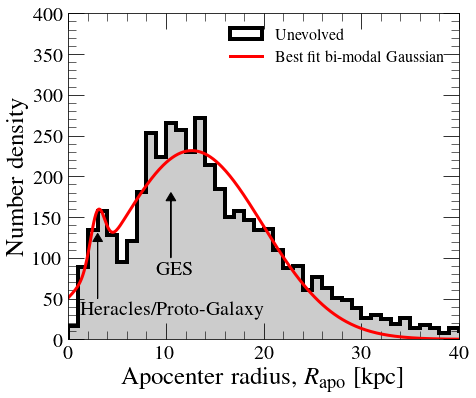

In [30]:
fig = plt.figure(figsize=(7,6), facecolor='white')

rapo_fit = np.linspace(0, 50, 500)

plt.hist(rapo,bins=np.linspace(0,50,51),histtype='step', color= 'k', lw=4, label='Unevolved')
plt.hist(rapo,bins=np.linspace(0,50,51), color= 'k', alpha=0.2)
plt.xlabel('Apocenter radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.ylabel('Number density', fontsize=25)
plt.plot(rapo_fit, bimodal(rapo_fit, *params), color='red', lw=3, label='Best fit bi-modal Gaussian')
# plt.plot(rapo_fit, gauss(rapo_fit, *params[:3]), color='red', lw=1, ls="--")
# plt.plot(rapo_fit, gauss(rapo_fit, *params[3:]), color='red', lw=1, ls="--")

plt.xlim(0,40)
# plt.ylim(0,0.0015)
# plt.xscale('log')
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.arrow(10.5,100,0,70, head_width = 1., head_length=10, color='k')
plt.text(9.,80,'GES', fontsize=20)
plt.ylim(0,400)
plt.arrow(3,50,0,70, head_width = 1, head_length=10, color='k')
plt.text(1.2,30,'Heracles/Proto-Galaxy', fontsize=20)

plt.savefig('../plots/rapo.pdf',dpi=200, bbox_inches = 'tight')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


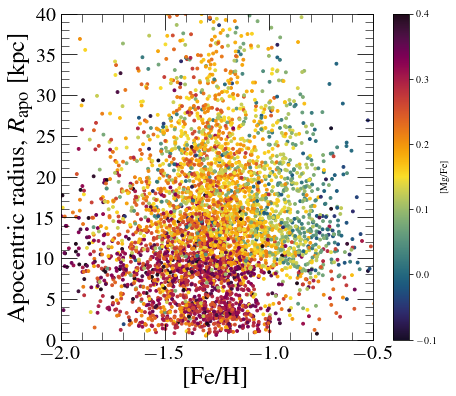

In [29]:
fig = plt.figure(figsize=(7,6), facecolor='white')

rapo_fit = np.linspace(0, 50, 500)

plt.scatter(data['FE_H'][mask&mask_une], rapo, s=8, c=data['MG_FE'][mask&mask_une], cmap=cm.pride, vmin=-0.1, vmax=0.4)
plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('[Fe/H]', fontsize=25)
plt.colorbar(label='[Mg/Fe]')
plt.ylim(0,40)
plt.xlim(-2,-0.5)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


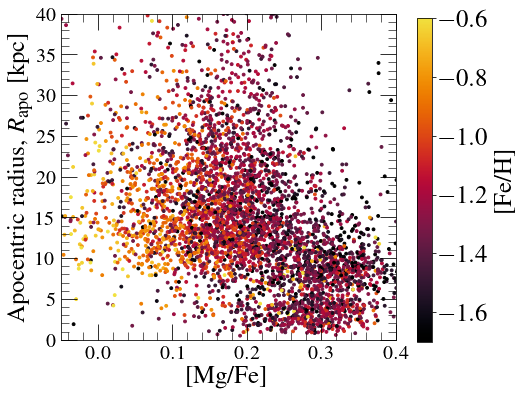

In [47]:
fig = plt.figure(figsize=(6,6), facecolor='white')

rapo_fit = np.linspace(0, 50, 500)

color = plt.scatter(data['MG_FE'][mask&mask_une], rapo, s=8, c=data['FE_H'][mask&mask_une], cmap=cm.ember, vmin=-1.7, vmax=-0.6)
plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('[Mg/Fe]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-0.05,0.4)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

cbar_ax = fig.add_axes([0.95, 0.12, 0.035,0.75])
cb = plt.colorbar(color, cax = cbar_ax,orientation='vertical')
cb.set_label(label=r'[Fe/H]',fontsize=25)
cb.ax.tick_params(labelsize=25)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

plt.savefig('../plots/rapo-mgfe.pdf',dpi=200, bbox_inches = 'tight')


# include this plot in the paper

# Assess the contamination from GES stars in the Heracles/proto-MW sample

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


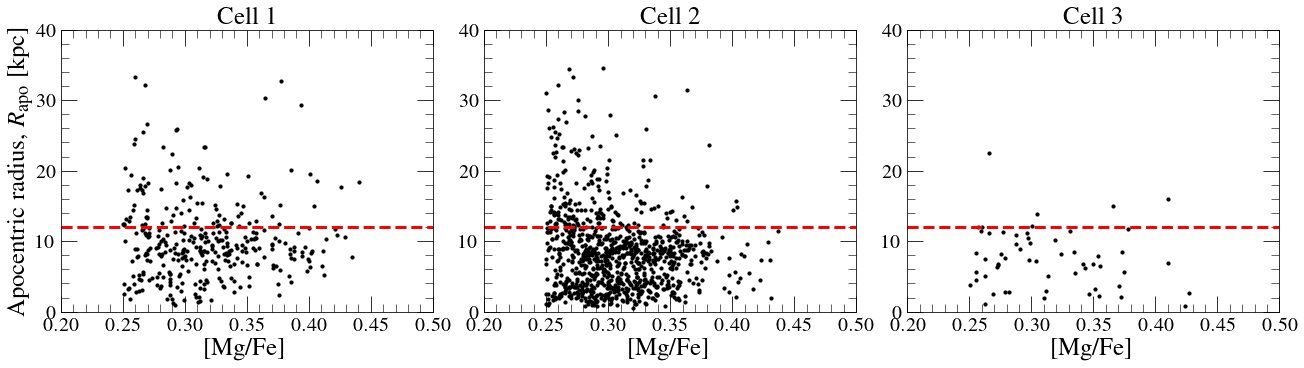

In [87]:
plt.figure(figsize=(18,5), facecolor='white', constrained_layout=True)

plt.subplot(1,3,1)
plt.title('Cell 1', fontsize=25)
mask_cell1 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.5)&(data['FE_H'][mask&mask_une]>-2)&(rapo<35)
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.scatter(data['MG_FE'][mask&mask_une][mask_cell1], rapo[mask_cell1],s=10, c='k')
plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('[Mg/Fe]', fontsize=25)
plt.ylim(0,40)
plt.xlim(0.2,0.5)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.title('Cell 2', fontsize=25)
mask_cell2 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.)&(data['FE_H'][mask&mask_une]>-1.5)&(rapo<35)
plt.scatter(data['MG_FE'][mask&mask_une][mask_cell2], rapo[mask_cell2],s=10, c='k')
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
# plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('[Mg/Fe]', fontsize=25)
plt.ylim(0,40)
plt.xlim(0.2,0.5)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.title('Cell 3', fontsize=25)
mask_cell3 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-0.5)&(data['FE_H'][mask&mask_une]>-1.)&(rapo<35)
plt.scatter(data['MG_FE'][mask&mask_une][mask_cell3], rapo[mask_cell3],s=10, c='k')
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
# plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('[Mg/Fe]', fontsize=25)
plt.ylim(0,40)
plt.xlim(0.2,0.5)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


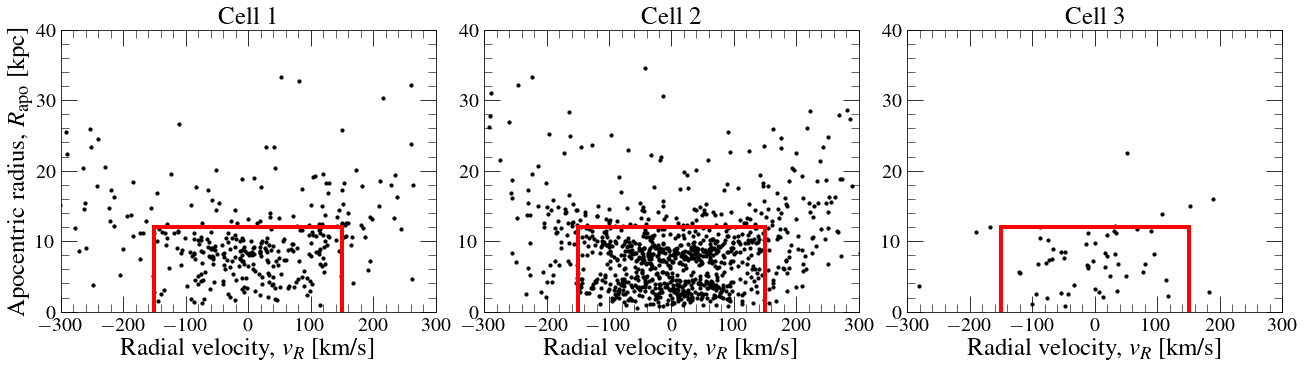

In [103]:
plt.figure(figsize=(18,5), facecolor='white', constrained_layout=True)

plt.subplot(1,3,1)
plt.title('Cell 1', fontsize=25)
mask_cell1 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.5)&(data['FE_H'][mask&mask_une]>-2)&(rapo<35)
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.scatter(vR[mask&mask_une][mask_cell1], rapo[mask_cell1],s=10, c='k')
plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-300,300)
plt.plot([-150,-150],[0,12], lw=4, color='r')
plt.plot([150,150],[0,12], lw=4, color='r')
plt.plot([-150,150],[12,12], lw=4, color='r')
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.title('Cell 2', fontsize=25)
mask_cell2 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.)&(data['FE_H'][mask&mask_une]>-1.5)&(rapo<35)
plt.scatter(vR[mask&mask_une][mask_cell2], rapo[mask_cell2],s=10, c='k')
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.plot([-150,-150],[0,12], lw=4, color='r')
plt.plot([150,150],[0,12], lw=4, color='r')
plt.plot([-150,150],[12,12], lw=4, color='r')
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-300,300)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.title('Cell 3', fontsize=25)
mask_cell3 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-0.5)&(data['FE_H'][mask&mask_une]>-1.)&(rapo<35)
plt.scatter(vR[mask&mask_une][mask_cell3], rapo[mask_cell3],s=10, c='k')
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.plot([-150,-150],[0,12], lw=4, color='r')
plt.plot([150,150],[0,12], lw=4, color='r')
plt.plot([-150,150],[12,12], lw=4, color='r')
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-300,300)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


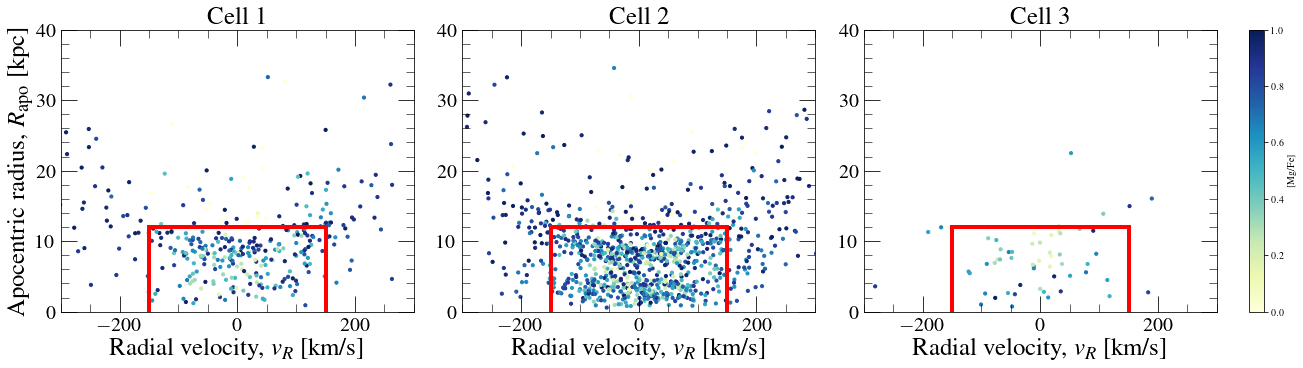

In [117]:
plt.figure(figsize=(18,5), facecolor='white', constrained_layout=True)

plt.subplot(1,3,1)
plt.title('Cell 1', fontsize=25)
mask_cell1 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.5)&(data['FE_H'][mask&mask_une]>-2)&(rapo<35)
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.scatter(vR[mask&mask_une][mask_cell1], rapo[mask_cell1],s=10, c=data['ecc'][mask&mask_une][mask_cell1], cmap='YlGnBu', vmin=0, vmax=1)
plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-300,300)
plt.plot([-150,-150],[0,12], lw=4, color='r')
plt.plot([150,150],[0,12], lw=4, color='r')
plt.plot([-150,150],[12,12], lw=4, color='r')
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.title('Cell 2', fontsize=25)
mask_cell2 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.)&(data['FE_H'][mask&mask_une]>-1.5)&(rapo<35)
plt.scatter(vR[mask&mask_une][mask_cell2], rapo[mask_cell2],s=10, c=data['ecc'][mask&mask_une][mask_cell2], cmap='YlGnBu', vmin=0, vmax=1)
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.plot([-150,-150],[0,12], lw=4, color='r')
plt.plot([150,150],[0,12], lw=4, color='r')
plt.plot([-150,150],[12,12], lw=4, color='r')
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-300,300)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.title('Cell 3', fontsize=25)
mask_cell3 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-0.5)&(data['FE_H'][mask&mask_une]>-1.)&(rapo<35)
plt.scatter(vR[mask&mask_une][mask_cell3], rapo[mask_cell3],s=10, c=data['ecc'][mask&mask_une][mask_cell3], cmap='YlGnBu', vmin=0, vmax=1)
plt.colorbar(label='[Mg/Fe]')
plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.plot([-150,-150],[0,12], lw=4, color='r')
plt.plot([150,150],[0,12], lw=4, color='r')
plt.plot([-150,150],[12,12], lw=4, color='r')
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-300,300)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()


In [104]:
rr = 12
mask_r = (rapo>rr)&(np.abs(vR[mask&mask_une])>150)
# cell 1
print(len(data[mask&mask_une][mask_cell1 & mask_r]))
print(len(data[mask&mask_une][mask_cell1 & ~mask_r]))
print('Ratio for cell 1: '+str(len(data[mask&mask_une][mask_cell1 & mask_r])/len(data[mask&mask_une][mask_cell1 & ~mask_r])))
# cell 2
print(len(data[mask&mask_une][mask_cell2 & (rapo>rr)]))
print(len(data[mask&mask_une][mask_cell2 & (rapo<rr)]))
print('Ratio for cell 2: '+str(len(data[mask&mask_une][mask_cell2 & mask_r])/len(data[mask&mask_une][mask_cell2 & ~mask_r])))
# cell 3
print(len(data[mask&mask_une][mask_cell3 & (rapo>rr)]))
print(len(data[mask&mask_une][mask_cell3 & (rapo<rr)]))
print('Ratio for cell 3: '+str(len(data[mask&mask_une][mask_cell3 & mask_r])/len(data[mask&mask_une][mask_cell3 & ~mask_r])))



47
289
Ratio for cell 1: 0.16262975778546712
188
766
Ratio for cell 2: 0.11318553092182031
5
52
Ratio for cell 3: 0.03636363636363636


In [110]:
mask_cell5 = (data['MG_FE'][mask&mask_une]<0.25)&(data['MG_FE'][mask&mask_une]>0.05)&\
(data['FE_H'][mask&mask_une]<-1.)&(data['FE_H'][mask&mask_une]>-1.5)&(rapo<35)

print(len(data[mask&mask_une][mask_cell5 & mask_r]))
print(len(data[mask&mask_une][mask_cell5 & ~mask_r]))
print('Ratio for cell 5: '+str(len(data[mask&mask_une][mask_cell5 & mask_r])/len(data[mask&mask_une][mask_cell5 & ~mask_r])))


564
1251
Ratio for cell 5: 0.45083932853717024


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


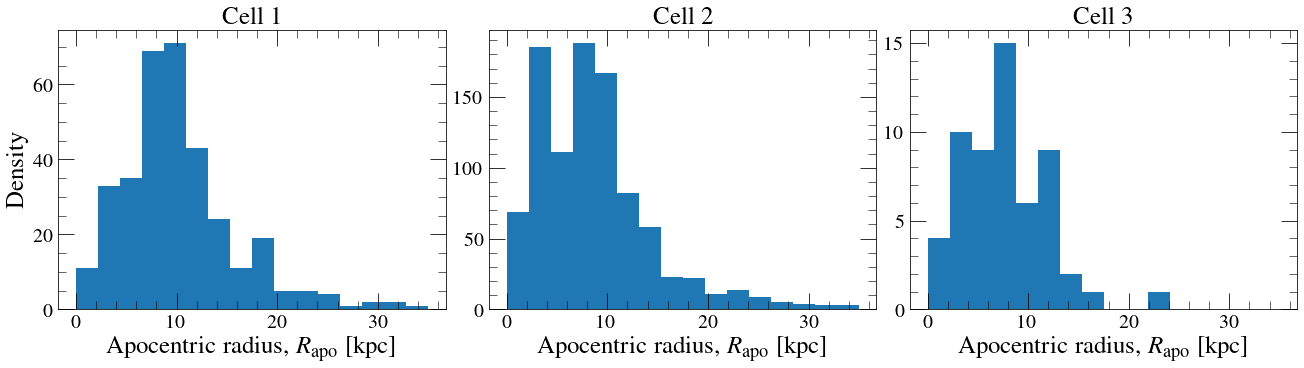

In [95]:
plt.figure(figsize=(18,5), facecolor='white', constrained_layout=True)

plt.subplot(1,3,1)
plt.title('Cell 1', fontsize=25)
mask_cell1 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.5)&(data['FE_H'][mask&mask_une]>-2)&(rapo<35)
plt.hist(rapo[mask_cell1],bins=np.linspace(0,35,17))
plt.xlabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.ylabel('Density', fontsize=25)
# plt.ylim(0,40)
# plt.xlim(0.2,0.5)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.title('Cell 2', fontsize=25)
mask_cell2 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.)&(data['FE_H'][mask&mask_une]>-1.5)&(rapo<35)
plt.hist(rapo[mask_cell2],bins=np.linspace(0,35,17))
# plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
# plt.ylim(0,40)
# plt.xlim(0.2,0.5)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.title('Cell 3', fontsize=25)
mask_cell3 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-0.5)&(data['FE_H'][mask&mask_une]>-1.)&(rapo<35)
plt.hist(rapo[mask_cell3],bins=np.linspace(0,35,17))
# plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
# plt.ylim(0,40)
# plt.xlim(0.2,0.5)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()


In [97]:
rr = 13
# cell 1
print(len(data[mask&mask_une][mask_cell1 & (rapo>rr)]))
print(len(data[mask&mask_une][mask_cell1 & (rapo<rr)]))
print('Ratio for cell 1: '+str(len(data[mask&mask_une][mask_cell1 & (rapo>rr)])/len(data[mask&mask_une][mask_cell1 & (rapo<rr)])))
# cell 2
print(len(data[mask&mask_une][mask_cell2 & (rapo>rr)]))
print(len(data[mask&mask_une][mask_cell2 & (rapo<rr)]))
print('Ratio for cell 2: '+str(len(data[mask&mask_une][mask_cell2 & (rapo>rr)])/len(data[mask&mask_une][mask_cell2 & (rapo<rr)])))
# cell 3
print(len(data[mask&mask_une][mask_cell3 & (rapo>rr)]))
print(len(data[mask&mask_une][mask_cell3 & (rapo<rr)]))
print('Ratio for cell 3: '+str(len(data[mask&mask_une][mask_cell3 & (rapo>rr)])/len(data[mask&mask_une][mask_cell3 & (rapo<rr)])))



75
261
Ratio for cell 1: 0.28735632183908044
157
797
Ratio for cell 2: 0.19698870765370138
4
53
Ratio for cell 3: 0.07547169811320754


In [50]:
vphi = data['vT']*220.
vR = data['vR']*220.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


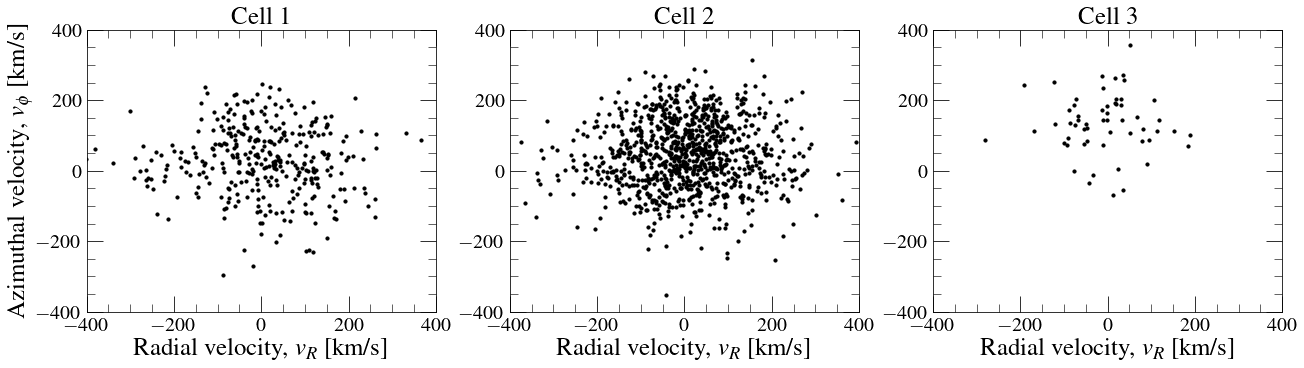

In [52]:
plt.figure(figsize=(18,5), facecolor='white', constrained_layout=True)

plt.subplot(1,3,1)
plt.title('Cell 1', fontsize=25)
mask_cell1 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.5)&(data['FE_H'][mask&mask_une]>-2)
# plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
plt.scatter(vR[mask&mask_une][mask_cell1], vphi[mask&mask_une][mask_cell1],s=10, c='k')
plt.ylabel('Azimuthal velocity, $v_{\phi}$ [km/s]', fontsize=25)
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(-400,400)
plt.xlim(-400,400)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,2)
plt.title('Cell 2', fontsize=25)
mask_cell2 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-1.)&(data['FE_H'][mask&mask_une]>-1.5)
plt.scatter(vR[mask&mask_une][mask_cell2], vphi[mask&mask_une][mask_cell2],s=10, c='k')
# plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
# plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(-400,400)
plt.xlim(-400,400)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(1,3,3)
plt.title('Cell 3', fontsize=25)
mask_cell3 = (data['MG_FE'][mask&mask_une]>0.25)&(data['MG_FE'][mask&mask_une]<0.45)&\
(data['FE_H'][mask&mask_une]<-0.5)&(data['FE_H'][mask&mask_une]>-1.)
plt.scatter(vR[mask&mask_une][mask_cell3], vphi[mask&mask_une][mask_cell3],s=10, c='k')
# plt.hlines(12,0.2,0.5,color='r',lw=3, ls='dashed')
# plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('Radial velocity, $v_{R}$ [km/s]', fontsize=25)
plt.ylim(-400,400)
plt.xlim(-400,400)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()


15.865220189223104


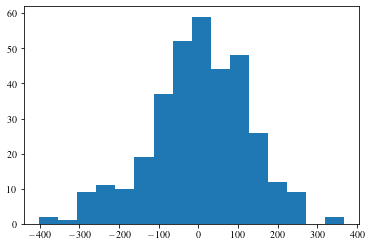

In [68]:
percen = np.percentile(vR[mask&mask_une][mask_cell1], [25,50,75])
h = 2 * (percen[2]-percen[0])* len(vR[mask&mask_une][mask_cell1])**(-1./3.)
binss = (np.nanmax(vR[mask&mask_une][mask_cell1]) - np.nanmin(vR[mask&mask_une][mask_cell1]))/h
print(binss)
plt.hist(vR[mask&mask_une][mask_cell1], bins=round(binss))
plt.show()

In [75]:
# the Heracles/Proto-MW stars have |vR|<130 km/s

print(len(vR[mask&mask_une][mask_cell1 & (np.abs(vR[mask&mask_une])>150)]))
print(len(vR[mask&mask_une][mask_cell1 & (np.abs(vR[mask&mask_une])<150)]))
print(len(vR[mask&mask_une][mask_cell1 & (np.abs(vR[mask&mask_une])>150)])/len(vR[mask&mask_une][mask_cell1 & (np.abs(vR[mask&mask_une])<150)]))


print(len(vR[mask&mask_une][mask_cell2 & (np.abs(vR[mask&mask_une])>150)]))
print(len(vR[mask&mask_une][mask_cell2 & (np.abs(vR[mask&mask_une])<150)]))
print(len(vR[mask&mask_une][mask_cell2 & (np.abs(vR[mask&mask_une])>150)])/len(vR[mask&mask_une][mask_cell2 & (np.abs(vR[mask&mask_une])<150)]))


print(len(vR[mask&mask_une][mask_cell3 & (np.abs(vR[mask&mask_une])>150)]))
print(len(vR[mask&mask_une][mask_cell3 & (np.abs(vR[mask&mask_une])<150)]))
print(len(vR[mask&mask_une][mask_cell3 & (np.abs(vR[mask&mask_une])>150)])/len(vR[mask&mask_une][mask_cell3 & (np.abs(vR[mask&mask_une])<150)]))


75
266
0.2819548872180451
188
777
0.24195624195624196
6
51
0.11764705882352941


In [54]:
#number of components
N_comp = 2

#initialise and fit GMM
gmm = skl_GMM(n_components=N_comp, covariance_type='full')
gmm.fit(np.dstack([vR[mask&mask_une][mask_cell1], vphi[mask&mask_une][mask_cell1]])[0])
#prepare Fe/H and Al/Fe bins
vRmin, vRmax = -300, 300
vphimin, vphimax = -300,300
x = np.linspace(vRmin, vRmax,32)
y = np.linspace(vphimin, vphimax,32)
dx, dy = x[1]-x[0], y[1]-y[0]
#generate histogram at these bins
hist, xedges,yedges = np.histogram2d(vR[mask&mask_une][mask_cell1], vphi[mask&mask_une][mask_cell1], bins=[x,y])
histnorm = np.sum(hist)*dx*dy
hist = hist/histnorm
poisson = np.sqrt(hist)
histnorm = np.sum(hist)*dx*dy
#find bin centers
xc = (x[1:]+x[:-1])/2.
yc = (y[1:]+y[:-1])/2.
#make a grid at the bin centers
X, Y = np.meshgrid(xc, yc)
XX = np.array([X.ravel(), Y.ravel()]).T
#estimate the gmm density at the bin centers
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)
datanorm = np.sum(hist)
modelnorm = np.sum(np.exp(Z))*dx*dy
hist = hist#/datanorm
Z = np.exp(Z)/modelnorm

In [63]:
gmm.weights_

array([0.47833116, 0.52166884])

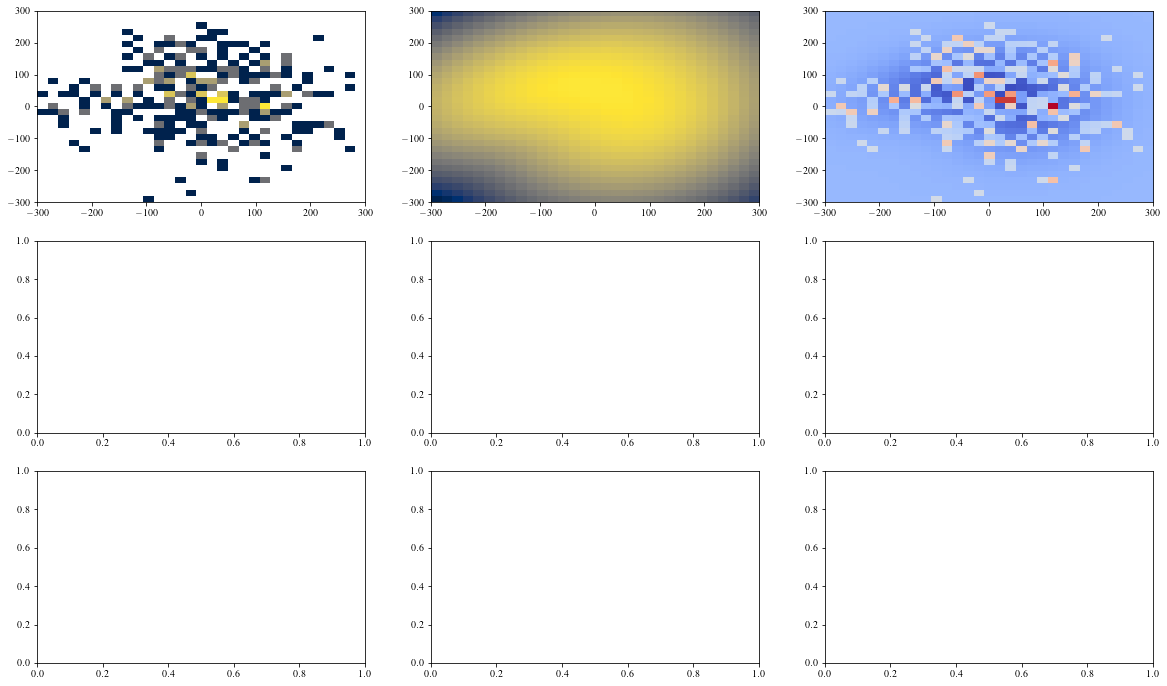

In [60]:
fig, ax = plt.subplots(3,3, sharex=False, sharey=False)
fig.set_size_inches(20,12)

# cell 1
cb2 = ax[0,0].imshow(np.rot90(hist),extent=[vRmin,vRmax,vphimin,vphimax],aspect='auto',norm=matplotlib.colors.LogNorm(),cmap=plt.cm.cividis)
cb3 = ax[0,1].imshow(Z[::-1],extent=[vRmin,vRmax,vphimin,vphimax],aspect='auto',norm=matplotlib.colors.LogNorm(),cmap=plt.cm.cividis)
residual = np.rot90(hist)-Z[::-1]
cb = ax[0,2].imshow(residual,extent=[vRmin,vRmax,vphimin,vphimax],aspect='auto',cmap=plt.cm.coolwarm)


In [25]:
# pick stars with [Mg/Fe] > 0.25 and Rapo > 10 kpc and assess the ratio with stars with [Mg/Fe] > 0.25 and Rapo < 10 kpc

ges_cont = (data['MG_FE'][mask&mask_une]>0.25)&(rapo>12)&(rapo<40)&(data['FE_H'][mask&mask_une]<-1.5)
hpw = (data['MG_FE'][mask&mask_une]>0.25)&(rapo<12)&(data['FE_H'][mask&mask_une]<-1.5)

print(len(data[mask&mask_une][ges_cont]))
print(len(data[mask&mask_une][hpw]))
print(len(data[mask&mask_une][ges_cont])/len(data[mask&mask_une][hpw]))


104
252
0.4126984126984127


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


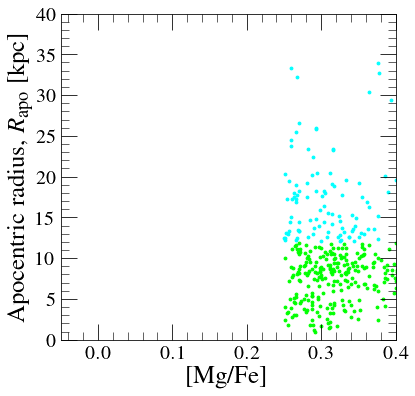

In [23]:
fig = plt.figure(figsize=(6,6), facecolor='white')

rapo_fit = np.linspace(0, 50, 500)

# plt.scatter(data['MG_FE'][mask&mask_une], rapo, s=0.1, c='k')
plt.scatter(data['MG_FE'][mask&mask_une][ges_cont], rapo[ges_cont], s=8, c='cyan')
plt.scatter(data['MG_FE'][mask&mask_une][hpw], rapo[hpw], s=8, c='lime')
plt.ylabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
plt.xlabel('[Mg/Fe]', fontsize=25)
plt.ylim(0,40)
plt.xlim(-0.05,0.4)
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

In [13]:
print(len(data[mask&mask_une][ges_cont]))
print(len(data[mask&mask_une][hpw]))

300
1082


In [24]:
print(np.mean(data['MG_FE_ERR'][mask&mask_une]))
bins  = 55/3 #2 bins per psf

0.027453791


183.33333333333334

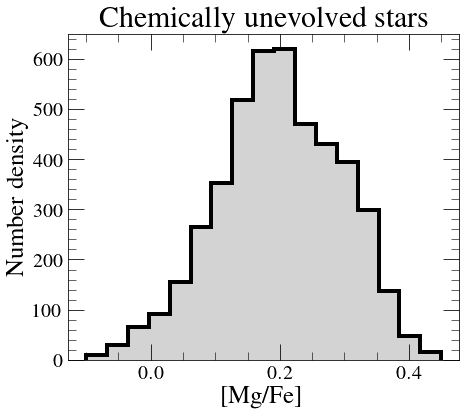

In [26]:
fig = plt.figure(figsize=(7,6), facecolor='white')

rapo_fit = np.linspace(0, 50, 500)

plt.title('Chemically unevolved stars', fontsize=30)
plt.hist(data['MG_FE'][mask&mask_une], bins=np.linspace(-0.1,0.45,18), histtype='step', color='k', lw=4)
plt.hist(data['MG_FE'][mask&mask_une], bins=np.linspace(-0.1,0.45,18), color='lightgray')
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlabel('[Mg/Fe]', fontsize=25)
plt.ylabel('Number density', fontsize=25)
plt.show()



In [7]:
y,binx_edges= np.histogram(rperi,np.linspace(0,50,51))
bincentres=(binx_edges[1:]+binx_edges[:-1])/2 # for len(x)==len(y)

expected=(3,1,180,10,5,330)
params,cov=curve_fit(bimodal,bincentres,y, expected)

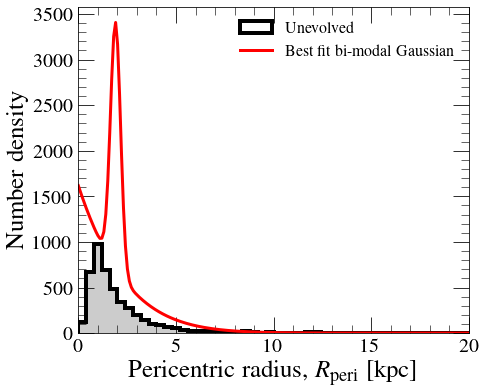

In [8]:
fig = plt.figure(figsize=(7,6), facecolor='white')

rapo_fit = np.linspace(0, 20, 200)

plt.hist(rperi,bins=np.linspace(0,20,51),histtype='step', color= 'k', lw=4, label='Unevolved')
plt.hist(rperi,bins=np.linspace(0,20,51), color= 'k', alpha=0.2)
plt.xlabel('Pericentric radius, $R_{\mathrm{peri}}$ [kpc]', fontsize=25)
plt.ylabel('Number density', fontsize=25)
plt.plot(rapo_fit, bimodal(rapo_fit, *params), color='red', lw=3, label='Best fit bi-modal Gaussian')
# plt.plot(rapo_fit, gauss(rapo_fit, *params[:3]), color='red', lw=1, ls="--")
# plt.plot(rapo_fit, gauss(rapo_fit, *params[3:]), color='red', lw=1, ls="--")

plt.xlim(0,20)
# plt.ylim(0,0.0015)
# plt.xscale('log')
plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.arrow(10.5,100,0,70, head_width = 1., head_length=10, color='k')
# plt.text(9.,80,'GES', fontsize=20)
# plt.ylim(0,400)
# plt.arrow(3,50,0,70, head_width = 1, head_length=10, color='k')
# plt.text(1.2,30,'Heracles/Proto-Galaxy', fontsize=20)

# plt.savefig('../plots/rapo.pdf',dpi=200, bbox_inches = 'tight')



In [ ]:

fig = plt.figure(figsize=(7,6), facecolor='white')

plt.scatter(rperi, rapo, s=1)
plt.xlim(0,20)
plt.ylim(0,50)

In [ ]:
vphi = data['vT']*220.
vR = data['vR']*220.

In [ ]:
rap = data['rapo']*8.178

In [ ]:
# plot the Tinsley diagram

fig = plt.figure(figsize=(7,6), facecolor='white')

# plt.subplot(1,2,1)
plt.hist2d(data['FE_H'][mask], data['MG_FE'][mask],bins=300, cmap='binary',rasterized=True)
color = plt.scatter(data['FE_H'][mask&mask_une], data['MG_FE'][mask&mask_une], s=4,c=vR[mask&mask_une], cmap=cm.sapphire, vmin=-200,vmax=200)
plt.xlabel('[Fe/H]', fontsize=25)
plt.ylabel('[Mg/Fe]', fontsize=25)
plt.xlim(-2.2,0.5)
plt.ylim(-0.2,0.5)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=12, pad=8)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True, pad=8)
plt.minorticks_on()

plt.plot([-0.5,-2], [0.05,0.05], lw=2, ls='--', c='k')
plt.plot([-0.5,-2], [0.45,0.45], lw=2, ls='--', c='k')
plt.plot([-0.5,-0.5], [-0.15,0.45], lw=2, ls='--', c='k')
plt.plot([-2,-2], [-0.15,0.45], lw=2, ls='--', c='k')
plt.plot([-1,-1], [-0.15,0.45], lw=2, ls='--', c='k')
plt.plot([-1.5,-1.5], [-0.15,0.45], lw=2, ls='--', c='k')
plt.plot([-0.5,-2], [0.25,0.25], lw=2, ls='--', c='k')

plt.plot([-0.5,-2], [-0.15,-0.15], lw=2, ls='--', c='k')

props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(-1.94,0.28,r'c1',fontsize=15,bbox=props)
plt.text(-1.44,0.28,r'c2',fontsize=15,bbox=props)
plt.text(-0.94,0.28,r'c3',fontsize=15,bbox=props)
plt.text(-1.94,0.08,r'c4',fontsize=15,bbox=props)
plt.text(-1.44,0.08,r'c5',fontsize=15,bbox=props)
plt.text(-0.94,0.08,r'c6',fontsize=15,bbox=props)
plt.text(-1.94,-0.12,r'c7',fontsize=15,bbox=props)
plt.text(-1.44,-0.12,r'c8',fontsize=15,bbox=props)
plt.text(-0.94,-0.12,r'c9',fontsize=15,bbox=props)

cbar = fig.colorbar(color,  aspect=15,orientation='horizontal',location='top')
cbar.set_label(label=r'Azimuthal velocity, $v_{\phi}$ [km s$^{-1}$]',fontsize=22,labelpad=10)
cbar.ax.tick_params(labelsize=15,pad=1)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')



# plt.subplot(1,2,2)
# rapo_fit = np.linspace(0, 30, 500)

# plt.hist(rapo[mask&mask_une&(rapo>-10)&(rapo<100)],bins=np.linspace(0,30,31),histtype='step', color= 'k', lw=4, label='Unevolved')
# plt.hist(rapo[mask&mask_une&(rapo>-10)&(rapo<100)],bins=np.linspace(0,30,31), color= 'k', alpha=0.2)
# plt.xlabel('Apocentric radius, $R_{\mathrm{apo}}$ [kpc]', fontsize=25)
# plt.ylabel('Number density', fontsize=25)
# plt.plot(rapo_fit, bimodal(rapo_fit, *params), color='red', lw=3, label='Best fit bi-modal Gaussian')
# # plt.plot(rapo_fit, gauss(rapo_fit, *params[:3]), color='red', lw=1, ls="--")
# # plt.plot(rapo_fit, gauss(rapo_fit, *params[3:]), color='red', lw=1, ls="--")

# # plt.xlim(0,30)
# # plt.ylim(0,0.0015)
# # plt.xscale('log')
# plt.legend(loc='upper right', frameon=False, fontsize=16, ncols=1)
# plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=16, pad=5)
# plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.arrow(10.5,100,0,70, head_width = 1., head_length=10, color='k')
# plt.text(9.,80,'GES', fontsize=20)
# plt.ylim(0,400)
# plt.arrow(3,50,0,70, head_width = 1, head_length=10, color='k')
# plt.text(1.2,30,'Heracles/Proto-Galaxy', fontsize=20)

# plt.savefig('../plots/tinsley-vphi.pdf',dpi=200, bbox_inches = 'tight')



In [ ]:
plt.hist(rap[mask&mask_une&(rap>0)], bins=np.linspace(0,50,26))
plt.show()

In [26]:
c1 = np.load('../sav/mask_c1.npy',allow_pickle=True)
c2 = np.load('../sav/mask_c2.npy',allow_pickle=True)
c3 = np.load('../sav/mask_c3.npy',allow_pickle=True)
c4 = np.load('../sav/mask_c4.npy',allow_pickle=True)
c5 = np.load('../sav/mask_c5.npy',allow_pickle=True)
c6 = np.load('../sav/mask_c6.npy',allow_pickle=True)
c7 = np.load('../sav/mask_c7.npy',allow_pickle=True)
c8 = np.load('../sav/mask_c8.npy',allow_pickle=True)
c9 = np.load('../sav/mask_c9.npy',allow_pickle=True)

In [29]:
c1.shape

(733900,)

In [ ]:
plt.hist(rap[c2], bins=np.linspace(0,50,14))
plt.show()

In [ ]:
plt.hist(rap[c5], bins=np.linspace(0,50,14))
plt.show()

# Assess the contamination from the GES in each cell 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4531 but corresponding boolean dimension is 733900

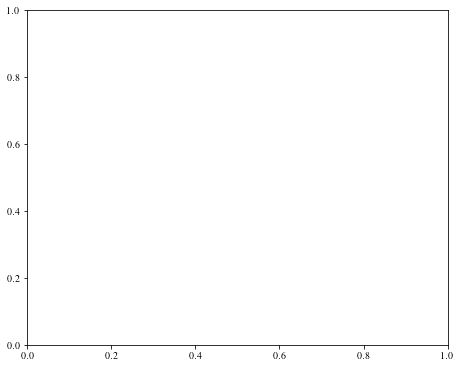

In [28]:
plt.figure(figsize=(18,5), facecolor='white', constrained_layout=True)

plt.subplot(1,3,1)
plt.scatter(data['MG_FE'][c1], rapo[c1])